In [0]:
!pip install qiskit

In [0]:
import qiskit
qiskit.__version__


'0.11.1'

In [0]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In [0]:
import numpy as np
imagen_entrada = np.zeros((8,8),np.uint8)
imagen_entrada[1][2] = 1
imagen_entrada[1][3] = 1
imagen_entrada[2][2] = 1
imagen_entrada[2][4] = 1
imagen_entrada[2][3] = 1
imagen_entrada[2][5] = 1
imagen_entrada[3][2] = 1
imagen_entrada[3][5] = 1
imagen_entrada[4][5] = 1


# para agregar columnas de ceros es iniciar uno a la iquierda y luego uno a la derecha,  y asíí hasta tener  n-1 del tamaño de la imagen de ancho
print(imagen_entrada, len(imagen_entrada),len(imagen_entrada[0]))
#salidas erosion y dilatacion
erosion= []
dilatacion = []


[[0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]] 8 8


In [0]:
def compuerta(circuit,a,b,c):
  circuit.x(a)
  circuit.toffoli(a,b,c)
  circuit.cx(c, b)
  circuit.x(a)
  circuit.cx(a,c)



In [0]:
def twoGate(circuit,imagen_entrada,i,j,a,b,c,d,e,f,g,x0,x1):
  if imagen_entrada[i][j] == 1:
    circuit.x(a)
  if x0 == 1:
    circuit.x(b)
  elif x0 == 2:
    circuit.h(b)
  if imagen_entrada[i][j+1] == 1:
    circuit.x(d)
  if x1 == 1:
    circuit.x(e)
  elif x1 == 2:
    circuit.h(e)
  compuerta(circuit,a,b,c)
  compuerta(circuit,d,e,f)
  compuerta(circuit,b,e,g) 


In [0]:
for i in range(len(imagen_entrada)-1):
  for j in range(len(imagen_entrada[0])-1):
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(20, 2)

    twoGate(circuit,imagen_entrada,i,j,0,1,2,3,4,5,6,0,2) 
    twoGate(circuit,imagen_entrada,i+1,j,7,8,9,10,11,12,13,2,0) 

    compuerta(circuit,6,13,14)
    compuerta(circuit,4,11,15)


    # Add a H gate on qubit 0
    #if imagen_entrada[i][j] == 1:
    #  circuit.x(0)
    #circuit.x(1)
    #if imagen_entrada[i][j+1] == 1:
    #  circuit.x(3)
    #circuit.x(4)
    #compuerta(circuit,0,1,2)
    #compuerta(circuit,3,4,5)
    #compuerta(circuit,1,4,6)
    # Map the quantum measurement to the classical bits
    circuit.measure([11,14], [0,1])

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=100)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    #print("max",max(counts))
    b = max(counts)
    #b = str(counts)[2:4]
    print( b, counts)
    #b = a[3:8]
    print("\nCount results:",(counts),b)
    if b == "00":
      erosion.append(0)
      dilatacion.append(0)
    elif b == "01":
      erosion.append(0)
      dilatacion.append(1)
    elif b == "10":
      erosion.append(1)
      dilatacion.append(0)
    elif b == "11":
      erosion.append(1)
      dilatacion.append(1)
    print(erosion)
    print(dilatacion)
# Draw the circuit
circuit.draw()

# Plot a histogram
#plot_histogram(counts)


00 {'00': 100}

Count results: {'00': 100} 00
[0]
[0]
00 {'00': 100}

Count results: {'00': 100} 00
[0, 0]
[0, 0]
10 {'00': 45, '10': 55}

Count results: {'00': 45, '10': 55} 10
[0, 0, 1]
[0, 0, 0]
10 {'00': 42, '10': 58}

Count results: {'00': 42, '10': 58} 10
[0, 0, 1, 1]
[0, 0, 0, 0]
00 {'00': 100}

Count results: {'00': 100} 00
[0, 0, 1, 1, 0]
[0, 0, 0, 0, 0]
00 {'00': 100}

Count results: {'00': 100} 00
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
00 {'00': 100}

Count results: {'00': 100} 00
[0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
00 {'00': 100}

Count results: {'00': 100} 00
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
10 {'00': 49, '10': 51}

Count results: {'00': 49, '10': 51} 10
[0, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
10 {'00': 20, '10': 80}

Count results: {'00': 20, '10': 80} 10
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 {'00': 44, '10': 56}

Count results: {'00': 44, '10': 56} 10
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0

In [0]:
x = dilatacion
x = np.array(x).reshape(7,7)
#x = np.delete(x, [6], axis=1)
print("dilatacion")
print()
print(x)


y = erosion
y = np.array(y).reshape(7,7)
#y = np.delete(y, [6], axis=1)
print("erosion")
print()
print(y)


dilatacion

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
erosion

[[0 0 1 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 0 0 1 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


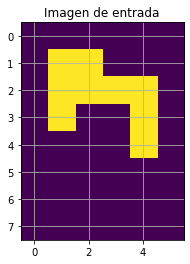

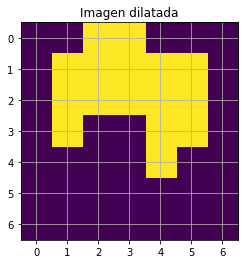

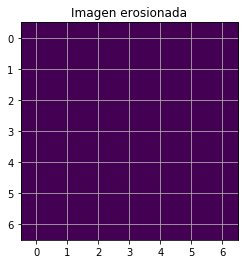

In [0]:
from pylab import *
#print("Imagen de entrada")
figure(1)
title('Imagen de entrada')

imagen_entrada_2 = np.delete(imagen_entrada, [0,7], axis=1)


imshow(imagen_entrada_2, interpolation='nearest')
grid(True)

#print("Imagen dilatada")
figure(2)
title('Imagen dilatada')
imshow(y, interpolation='nearest')
grid(True)

#print("Imagen erosionada")
figure(3)
title('Imagen erosionada')
imshow(x, interpolation='nearest')
grid(True)